# First example

This tutorial shows what a typical workflow with [species](https://species.readthedocs.io/en/latest/species.html) looks like. We will compare the colors and magnitudes of a few directly imaged companions with those of field dwarfs from the [Database of Ultracool Parallaxes](https://docs.google.com/spreadsheets/d/1i98ft8g5mzPp2DNno0kcz4B9nzMxdpyz5UquAVhz-U8/edit?usp=sharing).

## Initiating *species*

We start by importing the [species](https://species.readthedocs.io/en/latest/species.html) toolkit.

In [1]:
from species import SpeciesInit
from species.data.database import Database
from species.read.read_color import ReadColorMagnitude
from species.plot.plot_color import plot_color_magnitude

Next, the [configuration file](https://species.readthedocs.io/en/latest/configuration.html) (*species_config.ini*) is read from the working folder. Since the file does not exist, it is created with default values for the path of the HDF5 database and the location where the external data is stored. The database and data folder are also created since this is the first time that we run [species](https://species.readthedocs.io/en/latest/species.html) with the current configuration file. 

In [2]:
SpeciesInit()

species

Version: 0.10.3.dev11
Working folder: /Users/tomasstolker/applications/species/docs/tutorials

Creating species_config.ini... [DONE]
Creating species_database.hdf5... [DONE]
Creating data folder... [DONE]

Configuration settings:
   - Database: species_database.hdf5
   - Data folder: data
   - Magnitude of Vega: 0.03

Multiprocessing: mpi4py installed
Process number 1 out of 1...


## Adding a photometric library

A [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) object is now created, which can be used for importing data from the chosen data folder into the database.

In [3]:
database = Database()

The photometric data and parallaxes from the [Database of Ultracool Parallaxes](https://docs.google.com/spreadsheets/d/1i98ft8g5mzPp2DNno0kcz4B9nzMxdpyz5UquAVhz-U8/edit?usp=sharing) are downloaded and added to the database with the [add_photometry](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_photometry) method of [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database).

In [4]:
database.add_photometry('vlm-plx')


-----------------------
Add photometric library
-----------------------

Database tag: vlm-plx
Library: Database of Ultracool Parallaxes



100%|████████████████████████████████████████| 314k/314k [00:00<00:00, 695MB/s]


## Adding companion data

A library of magnitudes and parallaxes of directly imaged companions are available in the [companion_data](https://github.com/tomasstolker/species/blob/master/species/data/companion_data/companion_data.json) file. These can be added to the [Database](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database) with the [add_companion](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_companion) method (alternatively, photometric data of individual objects can be manually imported with [add_object](https://species.readthedocs.io/en/latest/species.data.html#species.data.database.Database.add_object)). In this example, we add the distance and magnitudes of 51 Eri b, beta Pic b, and PZ Tel B to the database. This will automatically download the filter profiles and a flux calibrated spectrum of Vega. These are required for the flux calibration of the companion magnitudes.

In [5]:
database.add_companion('51 Eri b', verbose=False)
database.add_companion('beta Pic b', verbose=False)
database.add_companion('PZ Tel B', verbose=False)

Add companion: ['51 Eri b']


100%|█████████████████████████████████████| 2.55k/2.55k [00:00<00:00, 3.59MB/s]
SHA256 hash of downloaded file: d050f0a5762b2fb277284fd7a514c9656605d720ee4dab1b61c35f05256d16a9
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.


100%|████████████████████████████████████████| 288k/288k [00:00<00:00, 232MB/s]


Adding spectrum: Vega


Reference: Bohlin et al. 2014, PASP, 126
URL: https://ui.adsabs.harvard.edu/abs/2014PASP..126..711B/abstract
Add companion: ['beta Pic b']


100%|█████████████████████████████████████| 8.50k/8.50k [00:00<00:00, 20.6MB/s]
SHA256 hash of downloaded file: 33e8d3ee32aa661f97624eda64e4a7f67dac2a7f22a072136a8414713379ef50
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
100%|████████████████████████████████████████| 913k/913k [00:00<00:00, 875MB/s]
SHA256 hash of downloaded file: 4b4507e4af6cec5711d2110974061584b8d23cc108daae7fa3be8c27d866847c
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
SHA256 hash of downloaded file: 4d523a06d8daae91f91d98f4ee8dacbfef7d17c6161a4c217dd56cd6006b9d56
Use this value as the 'known_hash' argument of 'pooch.retrieve' to ensure that the file hasn't changed if it is downloaded again in the future.
/Users/tomasstolker/applications/species/species/data/database.py:1525: UserWarning: Found 33 fluxes with NaN in the 

Add companion: ['PZ Tel B']


## Reading color-magnitude data

The colors and magnitudes from the [Database of Ultracool Parallaxes](https://docs.google.com/spreadsheets/d/1i98ft8g5mzPp2DNno0kcz4B9nzMxdpyz5UquAVhz-U8/edit?usp=sharing) are read from the database in the working folder by first creating an instance of [ReadColorMagnitude](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_color.ReadColorMagnitude).

In [6]:
colormag = ReadColorMagnitude(library='vlm-plx',
                              filters_color=('MKO/NSFCam.J', 'MKO/NSFCam.H'),
                              filter_mag='MKO/NSFCam.J')


--------------------
Read color-magnitude
--------------------

Database tag: vlm-plx
Library type: phot_lib
Filters color: ('MKO/NSFCam.J', 'MKO/NSFCam.H')
Filter magnitude: MKO/NSFCam.J


The data of the field dwarfs are now read with the [get_color_magnitude](https://species.readthedocs.io/en/latest/species.read.html#species.read.read_color.ReadColorMagnitude.get_color_magnitude) method. This returns a [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) with the requested data.

In [7]:
colorbox = colormag.get_color_magnitude(object_type='field')


-------------------
Get color-magnitude
-------------------

Object type: field
Returning ColorMagBox with 241 objects


We also create a list with the color and magnitude filter names that we want to extract for the directly imaged companions.

In [8]:
objects = [('51 Eri b', 'MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.J'),
           ('beta Pic b', 'Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.J'),
           ('PZ Tel B', 'Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.J')]

## Plotting a color-magnitude diagram

We will now combine the selected data in a color-magnitude diagram. The [ColorMagBox](https://species.readthedocs.io/en/latest/species.core.html#species.core.box.ColorMagBox) is provided in a list to the [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) function. The list with directly imaged objects is provided as argument of `objects`. We also add a reddening vector to show how the color changes for a size distribution of enstatite grains with a geometric mean radius of 0.1 $\mu$m and an extinction in the $J$ band of 1 mag. The discrete colorbar shows the spectral types of the field dwarfs and the directly imaged objects are labeled individually.


----------------------------
Plot color-magnitude diagram
----------------------------

Boxes:
   - ColorMagBox

Objects:
   - 51 Eri b: ('MKO/NSFCam.J', 'MKO/NSFCam.H', 'MKO/NSFCam.J')
   - beta Pic b: ('Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.J')
   - PZ Tel B: ('Paranal/NACO.J', 'Paranal/NACO.H', 'Paranal/NACO.J')

Spectral range: ('late M', 'late T')
Companion labels: True
Accretion markers: False

Mass labels: None
Teff labels: None

Reddening:
   - (('MKO/NSFCam.J', 'MKO/NSFCam.H'), ('MKO/NSFCam.J', 1.0), 'MgSiO3', 0.1, (-0.8, 10.0))

Figure size: (4.0, 4.8)
Limits x axis: (-1.2, 1.5)
Limits y axis: (21.0, 8.0)


Unpacking optical constants... [DONE]

Adding optical constants of MgSiO3... [DONE]
Adding optical constants of Fe... [DONE]


Adding log-normal dust cross sections:
   - Data shape (n_wavelength, n_radius, n_sigma): (67, 20, 20)
   - Wavelength range: 0.4 - 10.0 um
   - Mean geometric radius range: 0.001 - 10.0 um
   - Geometric standard deviation range: 1.0 -

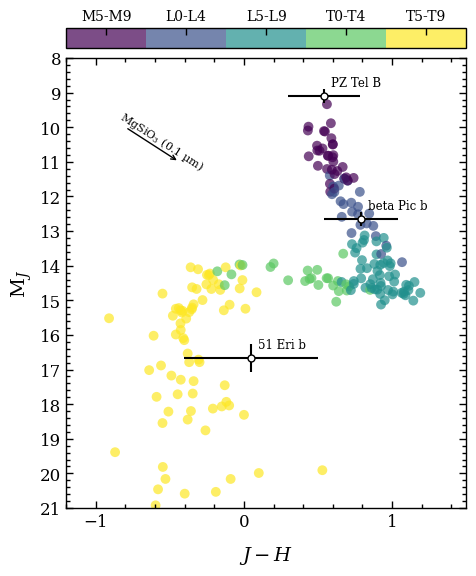

In [9]:
fig = plot_color_magnitude(boxes=[colorbox, ],
                           objects=objects,
                           reddening=[(('MKO/NSFCam.J', 'MKO/NSFCam.H'), ('MKO/NSFCam.J', 1.), 'MgSiO3', 0.1, (-0.8, 10.))],
                           label_x=r'$J - H$',
                           label_y=r'M$_J$',
                           xlim=(-1.2, 1.5),
                           ylim=(21., 8.),
                           offset=(-0.08, -0.08),
                           companion_labels=True,
                           field_range=('late M', 'late T'),
                           legend=None,
                           output=None)

The [plot_color_magnitude](https://species.readthedocs.io/en/latest/species.plot.html#species.plot.plot_color.plot_color_magnitude) function returned the [Figure](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure) object of the plot. The functionalities of [Matplotlib](https://matplotlib.org/stable/index.html) can be used for further customization of the plot. For example, the axes of the plot are stored at the `axes` attribute of `Figure`.

In [10]:
fig.axes

[<Axes: xlabel='$J - H$', ylabel='M$_J$'>, <Axes: >]